In [61]:
import numpy as np
import time
import pandas as pd
import random
from tqdm.notebook import tqdm

#### BST Class

In [41]:
class BST:

    def __init__(self,val = None):
        self.value = val
        self.left = None
        self.right = None

    def insert(self,val):
        if(self.value == None):
            self.value = val

        ## If we're at the leaf node
        # if(self.left == None and self.right == None):
        #     if(val<self.value):
        #         self.left = BST(val)
        #     else:
        #         self.right = BST(val)
        ## If we're not at the leaf node

        elif(val<self.value):
            if(self.left):
                self.left.insert(val)
            else:
                self.left = BST(val)
        else:
            if(self.right):
                self.right.insert(val)
            else:
                self.right = BST(val)
        
    def __contains__(self,val):
        if(self.value == val):
            return True
        
        if((self.left) and (val<self.value)):
            return val in self.left
        elif((self.right) and (val>=self.value)):
            return val in self.right

    
    def inorderTraversal(self):

        if(self.left):
            self.left.inorderTraversal()

        print(self.value,end = " ")

        if(self.right):
            self.right.inorderTraversal() 

    def printTree(self,lvl = 0,type = "central"):
        
        print("At level ",lvl," ",type," root is: ",self.value)

        if(self.left):
            print("left child is: ",self.left.value)
        if(self.right):
            print("right child is: ",self.right.value)
        
        if(self.left):
            self.left.printTree(lvl = lvl+1,type = "left")

        if(self.right):
            self.right.printTree(lvl = lvl+1,type = "right")
        

    
        


In [30]:
t1 = BST(3)

In [31]:
t1.insert(10)
t1.insert(1)
t1.insert(2)
t1.insert(9)
t1.insert(22)

In [32]:
t1.printTree()
print("Inorder traversal")
t1.inorderTraversal()

At level  0   central  root is:  3
left child is:  1
right child is:  10
At level  1   left  root is:  1
right child is:  2
At level  2   right  root is:  2
At level  1   right  root is:  10
left child is:  9
right child is:  22
At level  2   left  root is:  9
At level  2   right  root is:  22
Inorder traversal
1 2 3 9 10 22 

In [42]:
my_tree = BST()
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.insert(item)

In [45]:
my_tree.printTree()
print("Inorder Traversal")
my_tree.inorderTraversal()

At level  0   central  root is:  55
left child is:  37
right child is:  62
At level  1   left  root is:  37
left child is:  14
right child is:  49
At level  2   left  root is:  14
right child is:  17
At level  3   right  root is:  17
At level  2   right  root is:  49
At level  1   right  root is:  62
right child is:  71
At level  2   right  root is:  71
Inorder Traversal
14 17 37 49 55 62 71 

In [47]:
print(55 in my_tree)
print(47 in my_tree)


True
False


In [227]:
dict_times = {}

itrtr = [2**i for i in range(1,24)]


for i in tqdm(itrtr):
    my_tree = BST()
    lst = random.sample(range(1,10000000),i)
    tree_setup_time_str = time.perf_counter()
    for j in lst:
        my_tree.insert(j)
    tree_setup_time_stop = time.perf_counter()
    tree_setup_time = tree_setup_time_stop - tree_setup_time_str

    tree_query_times_strt = time.perf_counter()
    for j in lst:
        j in my_tree
        #val_smple = random.randint(1,1000)
        #val_smple in my_tree
    tree_query_times_stop = time.perf_counter()

    tree_query_time = (tree_query_times_stop - tree_query_times_strt)/i
    dict_times[i] = {}
    dict_times[i]['setup_time'] = tree_setup_time
    dict_times[i]['query_time'] = tree_query_time
    
        

  0%|          | 0/23 [00:00<?, ?it/s]

In [228]:
dict_times

{2: {'setup_time': 2.9332999474718235e-05,
  'query_time': 3.5000002753804438e-06},
 4: {'setup_time': 4.249999619787559e-06, 'query_time': 7.082498996169306e-07},
 8: {'setup_time': 8.291999620269053e-06, 'query_time': 8.281249392894097e-07},
 16: {'setup_time': 2.3874999897088856e-05,
  'query_time': 1.1562500503714546e-06},
 32: {'setup_time': 4.858399915974587e-05,
  'query_time': 1.3216249499237165e-06},
 64: {'setup_time': 0.00011491700024635065,
  'query_time': 1.5156250015024852e-06},
 128: {'setup_time': 0.0002882089993363479,
  'query_time': 3.2298203080927124e-06},
 256: {'setup_time': 0.0007241670009534573,
  'query_time': 2.296222653797031e-06},
 512: {'setup_time': 0.00153133300045738, 'query_time': 2.631429687482978e-06},
 1024: {'setup_time': 0.003297625000413973,
  'query_time': 2.7102460933292605e-06},
 2048: {'setup_time': 0.006479375000708387,
  'query_time': 2.6840820304130375e-06},
 4096: {'setup_time': 0.014497415999358054,
  'query_time': 3.2203876951797383e-06}

In [229]:
n_vals = list(dict_times.keys())
n_vals.sort()
setup_times = []
query_times = []

for i in n_vals:
    setup_times.append(dict_times[i]['setup_time'])
    query_times.append(dict_times[i]['query_time'])


<AxesSubplot:>

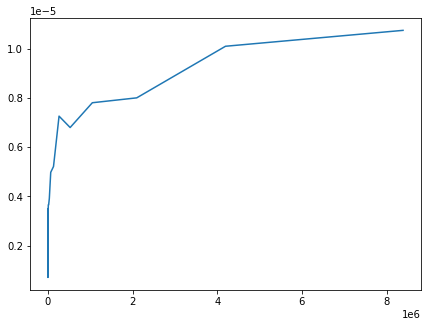

In [230]:
import seaborn as sns
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))


sns.lineplot(x = n_vals,y = query_times,ax = ax)
#ax.set_xlim([0, 5])
#ax.set_ylim([0, 0.00001])


(-10.0, 10.0)

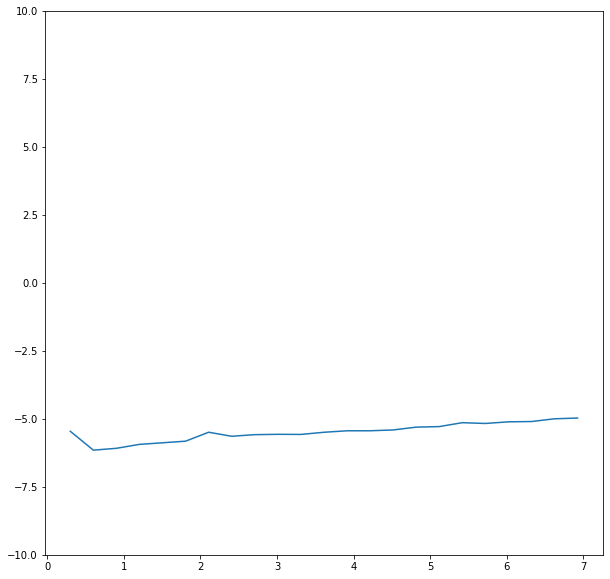

In [232]:
n_log = np.log10(n_vals)
f2, ax2 = plt.subplots(figsize=(10, 10))
query_times_log = np.log10(query_times)
sns.lineplot(x = n_log,y = query_times_log,ax = ax2)
ax2.set_ylim([-10,10])

<AxesSubplot:>

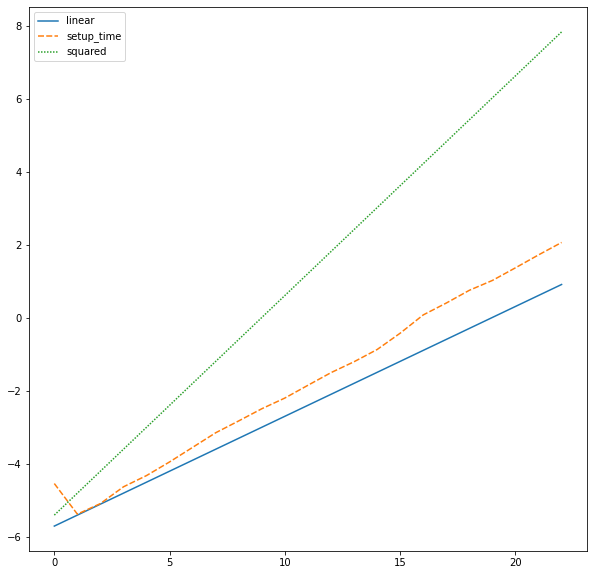

In [258]:
n_log = np.log10([val/1000000 for val in n_vals])
n_sq = np.log10([(val**2/1000000) for val in n_vals])
f3, ax3 = plt.subplots(figsize=(10, 10))
setup_times_log = np.log10(setup_times)
dict_curve = dict(linear = n_log,setup_time = setup_times_log,squared = n_sq) 
data_ = pd.DataFrame(dict_curve)
sns.lineplot(data = data_)



y = n/a would still be O(n) so divide the n values by a factor in order for the curves to be in the same y range, alternatively could translate the nlogn curve by adding a constant

In [242]:
print((n_sq[-1] - n_sq[0])/(n_log[-1] - n_log[0]))
print((setup_times_log[-1] - setup_times_log[5])/(n_log[-1] - n_log[5]))

2.0
1.1754365711561963


<AxesSubplot:>

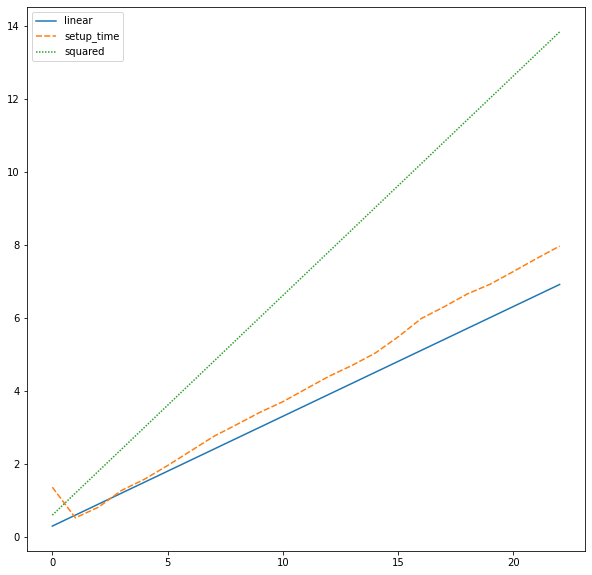

In [249]:
n_log = np.log10(n_vals)
n_sq = np.log10([val**2 for val in n_vals])
f3, ax3 = plt.subplots(figsize=(10, 10))
setup_times_log = np.log10(setup_times)
dict_curve = dict(linear = n_log,setup_time = setup_times_log + 5.9,squared = n_sq) 
data_ = pd.DataFrame(dict_curve)
sns.lineplot(data = data_)